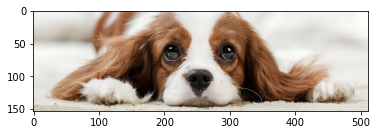

source pixel252code strength after encoding:00010011101
source pixel255code strength after encoding:00010011100
source pixel253code strength after encoding:1010110011
source pixel254code strength after encoding:1010110010
source pixel251code strength after encoding:0001001111
source pixel20code strength after encoding:101011000
source pixel131code strength after encoding:011011111
source pixel21code strength after encoding:011011110
source pixel22code strength after encoding:011011101
source pixel17code strength after encoding:011011100
source pixel133code strength after encoding:011011001
source pixel36code strength after encoding:011011000
source pixel107code strength after encoding:011001111
source pixel31code strength after encoding:011001110
source pixel129code strength after encoding:011001101
source pixel14code strength after encoding:011001100
source pixel27code strength after encoding:011001011
source pixel104code strength after encoding:011001010
source pixel41code strength a

60162048
[239. 240. 235.]
Decoding has been completed: the picture is stored as decode2.bmp


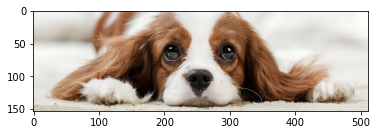

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
#Using python's PIL module to process images 
#coding: utf-8
class node: #Node's class
         #Define node construction method
    def __init__(self,right=None,left=None, parent=None, weight=0, code=None):
        self.left = left 
        self.right = right 
        self.parent = parent 
        self.weight = weight #weight
        self.code = code #Node value
        
 #Define function, convert the color image to a gray image, at this time each pixel of the image can be represented by a separate pixel value
def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()
    plt.imshow(img)
    plt.show()
    data = np.asarray( img, dtype="int32" )
    list1=[np.array(item).tolist() for item in data]
    return list1
 
 #Define function, count the number of times each pixel appears
def pixel_number_caculate(list2):
    pixel_number={}
    for j in range(len(list2)):
        for e in range(len(list2[0])):
            for i in list2[j][e]:
                if i not in pixel_number. keys():
                    pixel_number[i]=1 #If the pixel is not in the character frequency dictionary, add it directly
                else:
                    pixel_number[i] += 1 #If it exists in the character frequency string dictionary, add one to the corresponding value 
    return pixel_number
 
 #Construct a node, give its value and corresponding weight respectively 
def node_construct(pixel_number): 
    node_list =[]
    for i in range(len(pixel_number)):
        node_list.append(node(weight=pixel_number[i][1],code=str(pixel_number[i][0])))
    return node_list
 

 
 #According to the list of leaf nodes, generate the corresponding Huffman coding tree
def tree_construct(listnode):
    listnode = sorted(listnode,key=lambda node:node.weight) 
    while len(listnode) != 1:
                 # Each time the two pixel points of the weighted value are merged
        low_node0,low_node1 = listnode[0], listnode[1]
        new_change_node = node()
        new_change_node.weight = low_node0.weight + low_node1.weight
        new_change_node.left = low_node0
        new_change_node.right = low_node1
        low_node0.parent = new_change_node
        low_node1.parent = new_change_node
        listnode.remove(low_node0)
        listnode.remove(low_node1)
        listnode.append(new_change_node)
        listnode = sorted(listnode, key=lambda node:node.weight) 
    return listnode
 #The main function of Huffman coding, which completes the coding of pixels by calling other functions
def Huffman_Coding(picture):
    width=len(picture)
    height=len(picture[0])
    depth=len(picture[0][0])
    pixel_number = pixel_number_caculate(picture)
    pixel_number = sorted(pixel_number.items(),key=lambda item:item[1])
           
         #Construct the node list according to the value of the pixel and the number of occurrences 
    node_list = node_construct(pixel_number)
         # Construct a Huffman tree, save the head node
    head = tree_construct(node_list)[0]
           
         #Construction code table
    coding_table = {}
    for e in node_list:
        new_change_node = e
        coding_table.setdefault(e.code,"")
        while new_change_node !=head:
            if new_change_node.parent.left == new_change_node: 
                coding_table[e.code] = "1" + coding_table[e.code] 
            else:
                coding_table[e.code] = "0" + coding_table[e.code] 
            new_change_node = new_change_node.parent
         #Output the gray value and code of each image accumulation point
    for key in coding_table.keys():
        print ("source pixel" + key + "code strength after encoding:" + coding_table[key])
 
 
         #Output encoding table
    print ("The coding table is:", coding_table)
 
         #Convert the encoding result of the image into a string and save it in txt 
    counter=0
    coding_result = ''
    for i in range(len(picture)):
        for j in range(len(picture[0])):
            for e in picture[i][j]:
                for key,values in coding_table.items(): 
                    counter+=1
                    if str(e) == key:
                        coding_result = coding_result+values 
    print(counter)
    file = open('coding_result2.txt','w') 
    file.write(coding_result)
    return width,height,depth,coding_table,coding_result


 #Restore the original bmp image, traverse the result of Huffman encoding, for each traversed character is in the codeword list 
 ##Search in #, if not found, add the next character, continue to search, repeat this step until you find it in the code word list 
 #Go to the pixel corresponding to the codeword, and put the pixel value corresponding to the codeword into the pixel list.
def Decoding(width,height,depth,coding_table,coding_result): 
    code_read_now=''#The currently read code 
    new_pixel =np.ones((width,height,depth))
    i = 0
    x=0
    y=0
    z=0
    while i < coding_result.__len__():
        code_read_now = code_read_now + coding_result[i]
        for key in coding_table.keys():
            if code_read_now == coding_table[key]: 
                new_pixel[x][y][z]=int(key)
                code_read_now = ''
                z+=1
                if z==len(new_pixel[0][0]):
                    z=0
                    y+=1
                    if y==len(new_pixel[0]):
                        y=0
                        x+=1
                break
        i+=1
    print(new_pixel[0][0])               
         #Construct a new image
    def save_image( npdata, outfilename ) :
        img1 = Image.fromarray(np.asarray(npdata,dtype="uint8"))
        plt.imshow(img1)
        img1.save( outfilename )
        
    save_image(new_pixel,'decode2.bmp') 
    print("Decoding has been completed: the picture is stored as decode2.bmp")
picture = load_image('WhatsApp Image 2021-07-05 at 4.16.27 PM.jpeg')
a,b,f,c,d=Huffman_Coding(picture)
Decoding(a,b,f,c,d) 
        